In [153]:
import numpy as np
from matplotlib import pyplot
from scipy import linalg
import copy
import iMPS
from scipy.sparse import linalg
import funcs
from scipy.optimize import bisect
import sympy 
np.set_printoptions(linewidth=150)

In [2]:
rho1 = np.diag([1,0,0,0])
rho2 = np.diag([0,1,0,0])

A = np.random.random([4,4])
A = A+A.transpose()
s,u = np.linalg.eig(A)
S = np.array([[1,1,1,1],[1,1,-1,-1],[1,-1,1,-1],[1,-1,-1,1]])/2

In [32]:
np.diag(np.diag(u@rho1@u.transpose()))

array([[0.40513528, 0.        , 0.        , 0.        ],
       [0.        , 0.06092554, 0.        , 0.        ],
       [0.        , 0.        , 0.34154031, 0.        ],
       [0.        , 0.        , 0.        , 0.19239887]])

In [31]:
np.diag(np.diag(u@rho2@u.transpose()))

array([[0.07383335, 0.        , 0.        , 0.        ],
       [0.        , 0.15286552, 0.        , 0.        ],
       [0.        , 0.        , 0.03396147, 0.        ],
       [0.        , 0.        , 0.        , 0.73933967]])

In [27]:
np.diag(np.diag(S@u@rho2@u.transpose()@S))

array([[3.07219796e-02, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 2.58383138e-04, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 3.44104771e-01, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 6.24914866e-01]])

In [ ]:
Q00,Q01,Q02,Q03 = sympy.symbols('Q00 Q01 Q02 Q03')
Q10,Q11,Q12,Q13 = sympy.symbols('Q10 Q11 Q12 Q13')
Q20,Q21,Q22,Q23 = sympy.symbols('Q20 Q21 Q22 Q23')
Q30,Q31,Q32,Q33 = sympy.symbols('Q30 Q31 Q32 Q33')

rho_ini = np.array([[Q00,Q01,Q02,Q03],[Q10,Q11,Q12,Q13],[Q20,Q21,Q22,Q23],[Q30,Q31,Q32,Q33]])
rho_ini = sympy.Array(rho_ini)

direct overlap

In [27]:
for i in range(0,3,1):
    print(i)

0
1
2


In [272]:
vs = np.array([[1/np.sqrt(2),1/np.sqrt(2),0,0],
    [1/np.sqrt(2),-1/np.sqrt(2),0,0],
    [0,0,1/np.sqrt(2),1/np.sqrt(2)],
    [0,0,1/np.sqrt(2),-1/np.sqrt(2)]])

HH = 1/np.sqrt(2)*np.array([[1,1,0,0],[1,-1,0,0],[0,0,1,1],[0,0,1,-1]])

S = 1/2*np.array([[1,1,1,1],[1,1,-1,-1],[1,-1,1,-1],[1,-1,-1,1]])
T = [1,1,1,-1]
N = np.array([[0,1,2,3],[1,0,3,2],[2,3,0,1],[3,2,1,0]])


def if_boson(a):
    #check whether anyon a is boson
    theta = 1
    for i in range(len(a)):
        theta = theta*T[a[i]]
    if theta == 1:
        return True
    else: 
        return False
    
def if_trivial_mutual(a,b):
    #check if anyon a and b have trivial mutual braiding statistics
    
    Sab = 1
    for i in range(len(a)):
        Sab = Sab*S[a[i],b[i]]*2
    if Sab == 1:
        return True
    else: 
        return False
    
def index2anyon(i,l = 2):
    b = [int(j) for j in f'{i:0{2*l}b}']
    anyon = []
    for k in range(0,2*l,2):
        anyon.append(b[k]*2+b[k+1])
    return anyon


def overlap(b,c,a):
    [a1,a2] = a
    
    if if_trivial_mutual(a1,b) and if_trivial_mutual(a2,b) and \
        if_trivial_mutual(a1,c) and if_trivial_mutual(a2,c) :
            if b==c: 
                return 1
            elif N[b[0],c[0]] == a1[0] and N[b[1],c[1]] == a1[1]:
                return 1
            elif N[b[0],c[0]] == a2[0] and N[b[1],c[1]] == a2[1]:
                return 1
            elif N[b[0],c[0]] == N[a1[0],a2[0]] and N[b[1],c[1]] == N[a1[1],a2[1]]:
                return 1
            else: 
                return 0
    else: 
        return 0
    
    
def overlap2(b,c,a):
    
            
            
    for i in range(len(a)):
        if not if_trivial_mutual(a[i],b):
            return 0
        if not if_trivial_mutual(a[i],c):
            return 0
        
    if b==c: 
            return 1
        
    k = [(N[b[i]][c[i]]) for i in range(len(b)) ]
    for i in range(len(a)):
        if k == a[i]:
            return 1
    if len(a)==2:
        for i in range(len(a)):
            for j in range(i,len(a)):
                k1 = [(N[a[i][m]][a[j][m]]) for m in range(len(a[0])) ]
                if k == k1:
                    return 1   
    if len(a)==3:        
        for i in range(len(a)):
            for j in range(i,len(a)):
                for l in range(j,len(a)):
                    k1 = [(N[a[i][m]][a[j][m]]) for m in range(len(a[0])) ]
                    k2 = [ (N[k1[m]][a[l][m]]) for m in range(len(a[0])) ]
                    if k == k2:
                        return 1    
    
    return 0
        
    
    

    
def symmetry_matrix(a= [[0,0],[0,0]],direction= None):
    
    
    #a anyon condensation type
    for i in range(len(a)):
        if not if_boson(a[i]):
            return (f'{a[i]} is not a boson')

    
    
    
    n = len(a[0])
        
    M = np.zeros([4**n,4**n,4**n,4**n])
    over = np.zeros([16,16])
    if if_boson(a[0]) and if_boson(a[1]):
        for i in range(16):
            b = index2anyon(i)
            for j in range(16):
                c = index2anyon(j)    
                #overlap of b and c should be : 1 if ab = c
                #                               0 if b or c is confined
                v1 = (np.kron(vs[b[0],:],vs[b[1],:])).reshape([16,1])
                v2 = (np.kron(vs[c[0],:],vs[c[1],:])).reshape([16,1])
                
                #print(v1.shape)
                M[i,j,:,:] = v1.dot(v2.transpose())
                
                
                over[i,j]=overlap(b,c,a)
                
    X = M.reshape([16**2,16**2])
    Sym = np.linalg.inv(X).dot(over.reshape([16**2,])).reshape([16,16])

    Sym = Sym/Sym[0,0]
    
    if direction == None:
        return Sym
    if direction =='h':
        return Sym[[0,1,4,5],:][:,[0,1,4,5]]
    if direction =='v':
        return Sym[[0,2,8,10],:][:,[0,2,8,10]]
    if direction =='hv':
        return Sym[[0,3,12,15],:][:,[0,3,12,15]]
    
    
def symmetry_matrix2(a= [[0,0],[0,0]],direction= None):
    
    
    #a anyon condensation type
    for i in range(len(a)):
        if not if_boson(a[i]):
            return (f'{a[i]} is not a boson')

    for i in range(len(a)):
        for j in range(i,len(a)):
            if not if_trivial_mutual(a[i],a[j]):
                
                print(f'This anyon condensation is not valid.')
                break
    
    
    n = len(a[0])
        
    M = np.zeros([4**n,4**n])
    for i in range(len(a)):
        if_boson(a[i])
    for i in range(4**n):
        b = index2anyon(i,n)
        for j in range(4**n):
            c = index2anyon(j,n)    
            #overlap of b and c should be : 1 if ab = c
            #                               0 if b or c is confined
            M[i,j] = overlap2(b,c,a)
                
                
               
                
    X = M.reshape([4]*2*n)

    for _ in range(2*n):
        X = np.tensordot(X,HH,([0],[0]))
    
    #swap = [(i+1)%n for i in range(n)]
    #X = X.transpose(swap+list(range(n,2*n)))
    
    
    Sym = X.reshape([4**n]*2)
    Sym = Sym/Sym[0,0]
    
    
    
    if direction == None:
        return Sym
    if direction =='h':
        idx_list = [(int(f'{i:00b}',base =4)) for i in range(2**len(a[0]))]
        return Sym[idx_list,:][:,idx_list]
        

In [202]:
a = [[0,0,0]]
print(symmetry_matrix2(a))


[[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]


In [194]:
n = 3
swap = [(i+1)%n for i in range(n)]
print(swap)
swap+list(range(n,2*n))

[1, 2, 0]


[1, 2, 0, 3, 4, 5]

[[1. 0. 0. 0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0. 0. 0. 1.]]
[[1. 0. 0. 1. 0. 1. 1. 0.]
 [0. 1. 1. 0. 1. 0. 0. 1.]
 [0. 1. 1. 0. 1. 0. 0. 1.]
 [1. 0. 0. 1. 0. 1. 1. 0.]
 [0. 1. 1. 0. 1. 0. 0. 1.]
 [1. 0. 0. 1. 0. 1. 1. 0.]
 [1. 0. 0. 1. 0. 1. 1. 0.]
 [0. 1. 1. 0. 1. 0. 0. 1.]]
[[1. 0. 0. 1. 0. 1. 1. 0.]
 [0. 1. 1. 0. 1. 0. 0. 1.]
 [0. 1. 1. 0. 1. 0. 0. 1.]
 [1. 0. 0. 1. 0. 1. 1. 0.]
 [0. 1. 1. 0. 1. 0. 0. 1.]
 [1. 0. 0. 1. 0. 1. 1. 0.]
 [1. 0. 0. 1. 0. 1. 1. 0.]
 [0. 1. 1. 0. 1. 0. 0. 1.]]


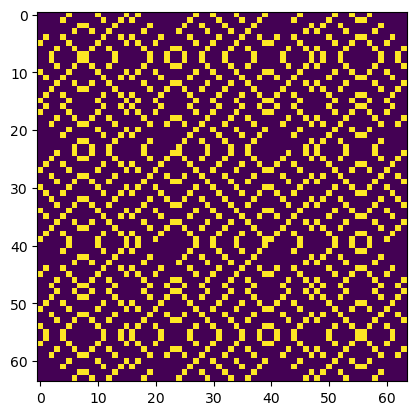

In [206]:
a1 = [[1,1,0],[2,2,0]]
a2 = [[2,2,0],[0,2,2]]

a3 = [[1,1,0],[2,2,0],[0,2,2]]

print(symmetry_matrix2(a1,direction = 'h'))
print(symmetry_matrix2(a2,direction = 'h'))
print(symmetry_matrix2(a3,direction = 'h'))
pyplot.imshow(symmetry_matrix2(a2)-symmetry_matrix2(a1))


In [274]:
H = [[1,1],[1,-1]]

Sym = [[1,0,0,0,0,0,1,0],
        [0,0,1,0,1,0,0,0],
        [0,1,0,0,0,0,0,1],
        [0,0,0,1,0,1,0,0],
        [0,0,1,0,1,0,0,0],
        [1,0,0,0,0,0,1,0],
        [0,0,0,1,0,1,0,0],
        [0,1,0,0,0,0,0,1]]


Sym = [[1,0,0,0,0,0,0,0],
        [0,0,0,0,1,0,0,0],
        [0,1,0,0,0,0,0,0],
        [0,0,0,0,0,1,0,0],
        [0,0,1,0,0,0,0,0],
        [0,0,0,0,0,0,1,0],
        [0,0,0,1,0,0,0,0],
        [0,0,0,0,0,0,0,1]]
a1=[[0,0,0],[2,2,0],[2,0,2]]
Sym = symmetry_matrix2(a1,direction = 'h')

In [275]:
Sym

array([[1., 0., 0., 1., 0., 1., 1., 0.],
       [0., 1., 1., 0., 1., 0., 0., 1.],
       [0., 1., 1., 0., 1., 0., 0., 1.],
       [1., 0., 0., 1., 0., 1., 1., 0.],
       [0., 1., 1., 0., 1., 0., 0., 1.],
       [1., 0., 0., 1., 0., 1., 1., 0.],
       [1., 0., 0., 1., 0., 1., 1., 0.],
       [0., 1., 1., 0., 1., 0., 0., 1.]])

In [269]:
Sym = np.array(Sym).reshape([2,2,2,2,2,2])
for i in range(6):
    Sym = np.tensordot(Sym,H,([0],[0]))
Sym = Sym.reshape(8,8)

In [266]:
print(Sym)

[[32.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0. 32.]]


In [177]:
i=0
j=2
b=[0,3,2]
k1 = [(N[a2[i][m]][a2[j][m]]) for m in range(len(a[0])) ]
k2 = [(N[k1[m]][b[m]]) for m in range(len(a[0])) ]
print(k1)
print(k2)

[3, 1, 2]
[3, 2, 0]


In [5]:
a = [[3,3],[0,0]]
Pme = symmetry_matrix(a).reshape([4,4,4,4])
Pme = Pme.transpose([0,2,1,3])
Pme = sympy.Array(Pme)
Pme

[[[[1.0, 0.0, 0.0, 0.0], [0.0, 1.0, 0.0, 0.0], [0.0, 0.0, 1.0, 0.0], [0.0, 0.0, 0.0, 1.0]], [[0.0, 1.0, 0.0, 0.0], [1.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, -1.0], [0.0, 0.0, -1.0, 0.0]], [[0.0, 0.0, 1.0, 0.0], [0.0, 0.0, 0.0, -1.0], [1.0, 0.0, 0.0, 0.0], [0.0, -1.0, 0.0, 0.0]], [[0.0, 0.0, 0.0, 1.0], [0.0, 0.0, -1.0, 0.0], [0.0, -1.0, 0.0, 0.0], [1.0, 0.0, 0.0, 0.0]]], [[[0.0, 1.0, 0.0, 0.0], [1.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, -1.0], [0.0, 0.0, -1.0, 0.0]], [[1.0, 0.0, 0.0, 0.0], [0.0, 1.0, 0.0, 0.0], [0.0, 0.0, 1.0, 0.0], [0.0, 0.0, 0.0, 1.0]], [[0.0, 0.0, 0.0, -1.0], [0.0, 0.0, 1.0, 0.0], [0.0, 1.0, 0.0, 0.0], [-1.0, 0.0, 0.0, 0.0]], [[0.0, 0.0, -1.0, 0.0], [0.0, 0.0, 0.0, 1.0], [-1.0, 0.0, 0.0, 0.0], [0.0, 1.0, 0.0, 0.0]]], [[[0.0, 0.0, 1.0, 0.0], [0.0, 0.0, 0.0, -1.0], [1.0, 0.0, 0.0, 0.0], [0.0, -1.0, 0.0, 0.0]], [[0.0, 0.0, 0.0, -1.0], [0.0, 0.0, 1.0, 0.0], [0.0, 1.0, 0.0, 0.0], [-1.0, 0.0, 0.0, 0.0]], [[1.0, 0.0, 0.0, 0.0], [0.0, 1.0, 0.0, 0.0], [0.0, 0.0, 1.0, 0.0], [0.0, 0.0, 

In [ ]:
"""Pme = symmetry_matrix(a).reshape([4,4,4,4]) #s,t,w,u

Pme = Pme.transpose([0,1,3,2])#s,t,u,w

Pme = Pme.reshape([16,16])

lam,U = np.linalg.eigh(Pme)


tP = U@np.diag(np.sqrt(lam+1e-10))@U.transpose()
tP = np.round(tP).reshape([4,4,4,4])
tP = sympy.Array(tP)

tP"""




In [ ]:
"""rho_f = sympy.tensorcontraction(sympy.tensorproduct(tP,rho_ini),(0,4))
rho_f = sympy.tensorcontraction(rho_f,(0,3))

((rho_f))"""

Two boundary symmetries

In [3]:
X = np.array([[0,1],[1,0]])
Id = np.eye(2)
X1234 = np.zeros([1,1,16,16])
X1234[0,0,:,:] = np.kron(X,np.kron(X,np.kron(X,X)))
X12 = np.zeros([1,1,16,16])
X12[0,0,:,:] = np.kron(X,np.kron(X,np.kron(Id,Id)))

X14= np.zeros([1,1,16,16])
X14[0,0,:,:] = np.kron(X,np.kron(Id,np.kron(Id,X)))

X13= np.zeros([1,1,16,16])
X13[0,0,:,:] = np.kron(X,np.kron(Id,np.kron(X,Id)))

X24= np.zeros([1,1,16,16])
X24[0,0,:,:] = np.kron(Id,np.kron(X,np.kron(Id,X)))

X23= np.zeros([1,1,16,16])
X23[0,0,:,:] = np.kron(Id,np.kron(X,np.kron(X,Id)))

X34= np.zeros([1,1,16,16])
X34[0,0,:,:] = np.kron(Id,np.kron(Id,np.kron(X,X)))


X1 = np.zeros([1,1,16,16])
X1[0,0,:,:] = np.kron(X,np.kron(Id,np.kron(Id,Id)))


X4 = np.zeros([1,1,16,16])
X4[0,0,:,:] = np.kron(Id,np.kron(Id,np.kron(Id,X)))


MPO1234 = iMPS.iMPO()
MPO1234.construct_from_tensor_list([X1234,X1234])

MPO14 = iMPS.iMPO()
MPO14.construct_from_tensor_list([X14,X14])

MPO13 = iMPS.iMPO()
MPO13.construct_from_tensor_list([X13,X13])

MPO12 = iMPS.iMPO()
MPO12.construct_from_tensor_list([X12,X12])

MPO1 = iMPS.iMPO()
MPO1.construct_from_tensor_list([X1,X1])

MPO4 = iMPS.iMPO()
MPO4.construct_from_tensor_list([X4,X4])


MPO23 = iMPS.iMPO()
MPO23.construct_from_tensor_list([X23,X23])

MPO24 = iMPS.iMPO()
MPO24.construct_from_tensor_list([X24,X24])

MPO34 = iMPS.iMPO()
MPO34.construct_from_tensor_list([X34,X34])

X123 = np.zeros([1,1,16,16])
X123[0,0,:,:] = np.kron(X,np.kron(X,np.kron(X,Id)))
MPO123 = iMPS.iMPO()
MPO123.construct_from_tensor_list([X123,X123])





In [4]:
lam1ss=[]
lam4ss=[]
lam12ss=[]
lam13ss=[]
lam14ss=[]
lam34ss=[]
lam24ss=[]
lam23ss=[]
lam1234ss=[]
dims=[]

A = np.array([[0.5,0.1],[0.2,-0.3]])
B = np.zeros([1,1,16])
B[0,0] =(linalg.expm(0.1*np.kron(A,A))).reshape([16,])
MPS = iMPS.iMPS()
MPS.svd_threshold =1e-10
MPS.max_bond = 15
MPS.construct_from_tensor_list([B,B])

rng = np.arange(0.,.8,0.05)
for p1 in np.arange(0.,.01,0.05): 
    lam1s=[]
    lam12s=[]
    lam13s=[]
    lam14s=[]
    lam1234s=[]
    lam34s=[]
    lam24s=[]
    lam23s=[]
    lam4s=[]
    
    
    for p2 in rng:
        #trans = funcs.single_trans_qc2(p1=p1,channel1='x_flip',p2=p2,channel2='z_flip')
        trans = funcs.single_trans_2layers(p1=p2,channel1='xzf_flip',p2=p2,channel2='xzf_flip')
        #trans = funcs.single_trans_2layers_swap(p1=p1,p2=p2,channel='x_flip')
        MPO = iMPS.iMPO()
        MPO.construct_from_tensor_list([trans,trans])

        MPS_power2 = iMPS.MPS_power_method_twosite(MPS,MPO,max_bond=15)
        MPS_power2.update(100,1e-6,1e-8)  
        
        dims.append(MPS_power2.MPS2.chi[0])
        
        strap = iMPS.strap(MPS_power2.MPS2,MPO12,MPS_power2.MPS2)
        lam12 = strap.calculate_eig()
        
        strap = iMPS.strap(MPS_power2.MPS2,MPO13,MPS_power2.MPS2)
        lam13 = strap.calculate_eig()
        
        strap = iMPS.strap(MPS_power2.MPS2,MPO14,MPS_power2.MPS2)
        lam14 = strap.calculate_eig()
        
        strap = iMPS.strap(MPS_power2.MPS2,MPO1234,MPS_power2.MPS2)
        lam1234 = strap.calculate_eig()
        
        strap = iMPS.strap(MPS_power2.MPS2,MPO1,MPS_power2.MPS2)
        lam1 = strap.calculate_eig()
        
        strap = iMPS.strap(MPS_power2.MPS2,MPO4,MPS_power2.MPS2)
        lam4 = strap.calculate_eig()
        
        
        strap = iMPS.strap(MPS_power2.MPS2,MPO24,MPS_power2.MPS2)
        lam24 = strap.calculate_eig()
        
        strap = iMPS.strap(MPS_power2.MPS2,MPO34,MPS_power2.MPS2)
        lam34 = strap.calculate_eig()
        
        strap = iMPS.strap(MPS_power2.MPS2,MPO23,MPS_power2.MPS2)
        lam23 = strap.calculate_eig()
    
        lam12s.append(lam12)
        lam13s.append(lam13)
        lam14s.append(lam14)
        lam1234s.append(lam1234)
        lam1s.append(lam1)
        lam4s.append(lam4)
        lam34s.append(lam34)
        lam24s.append(lam24)
        lam23s.append(lam23)
        print(p2)

    lam12ss.append(lam12s)
    lam13ss.append(lam13s)
    lam14ss.append(lam14s)
    lam1234ss.append(lam1234s)
    lam1ss.append(lam1s)
    lam4ss.append(lam4s)
    lam34ss.append(lam34s)
    lam24ss.append(lam24s)
    lam23ss.append(lam23s)
  

0.0
0.05
0.1
0.15000000000000002
0.2
0.25
0.30000000000000004
0.35000000000000003
0.4
0.45
0.5
0.55
0.6000000000000001
0.65
0.7000000000000001
0.75


In [7]:
p=0.3
M = np.zeros([4,4,2],dtype='complex')
M[:,:,0] =  np.sqrt(1-p)*np.array(np.kron(np.eye(2),np.eye(2)),dtype='complex')
M[:,:,1] =  np.sqrt(p)*np.array(np.kron(np.array([[0,1],[1,0]],dtype='complex'),np.array([[1,0],[0,-1]],dtype='complex')))

In [ ]:
dM = np.tensordot(M,M.conj(),([2],[2])).reshape([4,4,4,4])
#np.eye(2,dtype=complex)
M2 = funcs.qc(p,'x_flip')
dM2 = np.tensordot(M2,M2.conj(),([2],[2]))
dM2 = np.kron(dM2,dM2)
print(dM)

/Users/lizhuan/opt/anaconda3/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


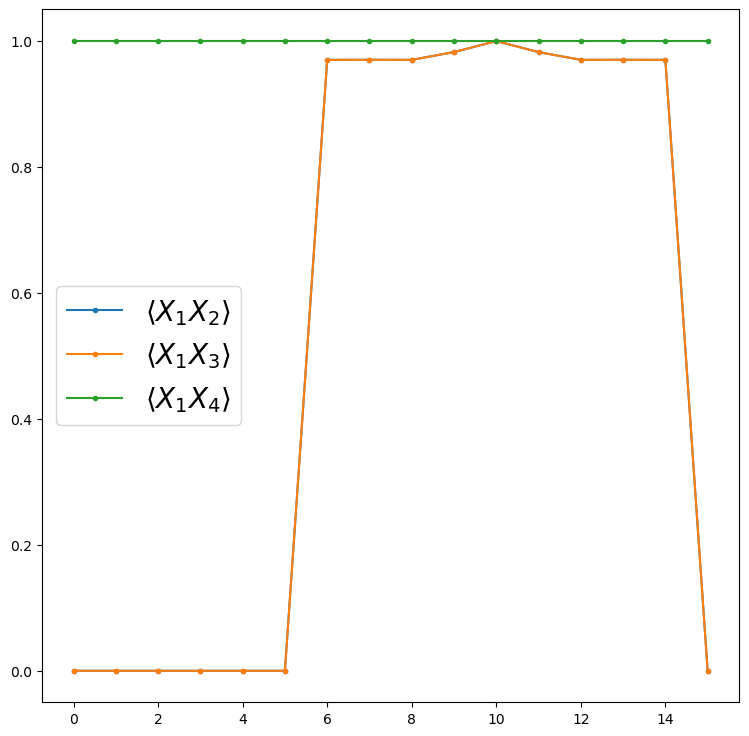

In [5]:
pyplot.figure(figsize=(9,9),dpi=100)
#pyplot.plot(rng,lam1234s,'.',label='$\langle X_1X_2X_3X_4 \\rangle$')

pyplot.plot(lam12s,'.-',label='$\langle X_1X_2 \\rangle$')
pyplot.plot(lam13s,'.-',label='$\langle X_1X_3 \\rangle$')
pyplot.plot(lam14s,'.-',label='$\langle X_1X_4 \\rangle$')
#pyplot.plot(dims,'.-',label='dim')
#pyplot.plot(rng,[1]*len(rng))
#pyplot.plot(rng[-25:],k*np.array(rng[-25:])+d,label='3.3399*p - 0.68003')
pyplot.legend(prop={'size':20})
pyplot.show()

In [ ]:
pyplot.figure(figsize=(18,9),dpi=120)
pyplot.imshow(np.real(lam13ss), origin='lower', extent=[ 0, 0.18,0.17, 0.31,],aspect=1)
x = np.arange(0.,0.18,0.001)
y = (1-np.sqrt(2)/2-x)/(1-x*2)
pyplot.plot(x,y,color='red')
pyplot.show()

In [ ]:
#rng = np.arange(0.06,0.09,0.002)
pyplot.figure(figsize=(9,9),dpi=100)
#pyplot.plot(rng,lam1234s,'.',label='$\langle X_1X_2X_3X_4 \\rangle$')

pyplot.plot(rng,lam12s,'.-',label='$\langle X_1X_2 \\rangle$')
pyplot.plot(rng,lam13s,'.-',label='$\langle X_1X_3 \\rangle$')
pyplot.plot(rng,lam14s,'.-',label='$\langle X_1X_4 \\rangle$')
pyplot.plot(rng,dims,'.-',label='dim')
#pyplot.plot(rng,[1]*len(rng))
#pyplot.plot(rng[-25:],k*np.array(rng[-25:])+d,label='3.3399*p - 0.68003')
pyplot.legend(prop={'size':20})
pyplot.show()

In [5]:
trans1 = funcs.single_trans_2layers(p1=0.6,channel1='test',p2=0.6,channel2='test')
#trans2 = funcs.single_trans_2layers(p1=0.6,channel1='test',p2=0.6,channel2='test')
trans2 = funcs.single_trans_2layers(p1=0.6,channel1='xzf_flip',p2=0.6,channel2='xzf_flip')

In [17]:
A = funcs.delta_tensor(4,2)
    
P = np.zeros([2,2,2])
P[0,0,0],P[1,1,0],P[0,1,1],P[1,0,1]=1,1,1,1
A3 = np.tensordot(np.tensordot(P,A,([1],[0])),P,([4],[0]))
A3 = np.transpose(A3,[0,2,3,4,1,5])
    
M1 = funcs.qc(0,'x_flip')
dM1 = np.tensordot(M1,M1.conj(),([2],[2]))
A3dM1 = np.tensordot(A3,dM1,([5],[1]))
dA3dM1 = np.tensordot(A3dM1,A3,([7],[5]))
M1 = funcs.qc(0.6,'x_flip')
dM1 = np.tensordot(M1,M1.conj(),([2],[2]))
dA3ddM1 = np.tensordot(dA3dM1,dM1,([4,11],[1,3]))
ddA3ddM = np.tensordot(dA3ddM1,dA3ddM1,([10,4,11,5],[11,5,10,4]))
ddA3ddM = np.transpose(ddA3ddM,[0,4,8,12,1,5,9,13,2,6,10,14,3,7,11,15])
ddA3ddM = ddA3ddM.reshape([16,16,16,16])

In [19]:
A = funcs.delta_tensor(4,2)
    
P = np.zeros([2,2,2])
P[0,0,0],P[1,1,0],P[0,1,1],P[1,0,1]=1,1,1,1
A3 = np.tensordot(np.tensordot(P,A,([1],[0])),P,([4],[0]))
A3 = np.transpose(A3,[0,2,3,4,1,5])
    
M1 = funcs.qc(0.6,'x_flip')
dM1 = np.tensordot(M1,M1.conj(),([2],[2]))
A3dM1 = np.tensordot(A3,dM1,([5],[1]))
dA3dM1 = np.tensordot(A3dM1,A3,([7],[5]))
M1 = funcs.qc(0,'x_flip')
dM1 = np.tensordot(M1,M1.conj(),([2],[2]))
dA3ddM1 = np.tensordot(dA3dM1,dM1,([4,11],[1,3]))
ddA3ddM2 = np.tensordot(dA3ddM1,dA3ddM1,([10,4,11,5],[11,5,10,4]))
ddA3ddM2 = np.transpose(ddA3ddM2,[0,4,8,12,1,5,9,13,2,6,10,14,3,7,11,15])
ddA3ddM2 = ddA3ddM2.reshape([16,16,16,16])

In [22]:
np.linalg.norm(ddA3ddM-ddA3ddM2.transpose([3,1,2,0]))

0.0

In [ ]:
x = np.arange(1,20)
y = 1 - 2**(-(x-1)/2)

In [ ]:
pyplot.plot(x,y,'.')
pyplot.plot(x,1-y,'.')


In [ ]:
(1-d)/k

In [ ]:
x = np.arange(.011,6,0.01)
y = []
def renyi2(x,n):
    return np.log2(x**n+(1-x)**n)/(1-n)

for i in x:
    def Hn(x):
        return renyi2(x,i)-0.5
    
    y.append( bisect(Hn,0,.3))

In [ ]:
pyplot.figure(figsize=(18,9),dpi=100)
pyplot.plot(x,y,'-')

pyplot.xticks(size=30)
pyplot.yticks(size=30)

In [ ]:
0.583627816

In [ ]:
0.5*(1-np.sqrt(3)/3)